Predictive Models

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Load csv data
path = "C:\\Users\\samsr\\Desktop\\DATR-1023-master\\instacart_2017_05_01"
aisles = pd.read_csv(path + "\\aisle.csv")
departments = pd.read_csv(path + '\\departments.csv')
orders = pd.read_csv(path + '\\orders_new.csv')
products = pd.read_csv(path + '\\prodcounts.csv')
order_products = pd.read_csv(path + '\\order_products_new.csv')


In [3]:
orders_sample=orders.sample(50000)

In [ ]:
products.head()

In [4]:
products.rename(index=str, columns={"reordered": "reordered_sum"}, inplace = True)

In [ ]:
order_products.head()

In [5]:
features = orders_sample.drop(columns=['Unnamed: 0']).merge(order_products[['order_id','product_id', 'add_to_cart_order', 'reordered']], on = 'order_id').merge(products.drop(columns=['Unnamed: 0']), on = 'product_id')
features.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,avg_days_between,total_orders,cart_size,product_id,add_to_cart_order,reordered,counts,product_name,aisle_id,department_id,department,reordered_sum,reorder_ratio
0,1470921,63891,20,0,11,4.0,12.958333,25,1,28199,1,1,41303,"Clementines, Bag",123,4,produce,24970,0.604557
1,3139115,159824,2,6,10,18.0,19.000000,5,16,28199,3,0,41303,"Clementines, Bag",123,4,produce,24970,0.604557
2,49405,76389,11,2,15,13.0,14.714286,15,23,28199,12,1,41303,"Clementines, Bag",123,4,produce,24970,0.604557
3,2641835,18978,54,1,13,3.0,3.821053,96,15,28199,9,1,41303,"Clementines, Bag",123,4,produce,24970,0.604557
4,1941815,51953,6,2,8,2.0,13.000000,9,21,28199,8,1,41303,"Clementines, Bag",123,4,produce,24970,0.604557


In [6]:
features.shape

(505977, 19)

In [ ]:
features.describe()

In [ ]:
sns.heatmap(features.corr())

In [24]:
# We have some NaN values in days_since_prior_order (the first order a customer ever places), replace with 0's
train = features.drop(columns=['product_name', 'department']).fillna(0).sample(n = 1000)
train.shape

(1000, 17)

In [25]:
from sklearn.preprocessing import StandardScaler
train_scaled= pd.DataFrame(StandardScaler().fit_transform(train))

In [30]:
# Find optimal K
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.model_selection import ParameterGrid

inertia_dict = {}
for k in range (1, 61):
 
    model = KMeans(n_clusters=k, random_state=1).fit(train_scaled)
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    inertia = model.inertia_
    inertia_dict[k]=inertia
    
intertiadf = pd.DataFrame.from_dict(inertia_dict, orient='index')
intertiadf

,0
1,17000.000000
2,15155.963510
3,13536.852570
4,12710.066266
5,12082.308110
6,11562.041414
7,11238.579287
8,10960.400215
9,10721.359817
10,10494.180165


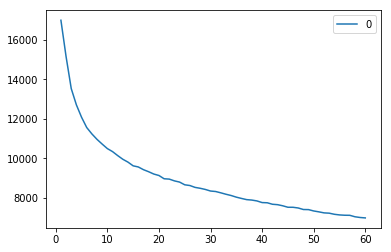

In [31]:
intertiadf.plot()

Elbow @ K = 10

In [7]:
# Scale the features df
from sklearn.preprocessing import StandardScaler
features_scaled= pd.DataFrame(StandardScaler().fit_transform(features.drop(columns=['product_name', 'department']).fillna(0)))

In [10]:
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,predicted
0,-0.246729,-0.658676,0.166311,-1.304907,-0.571931,-0.729285,0.273635,-0.334582,-1.525672,0.186942,-1.025217,0.836829,0.049086,1.356424,-0.939927,-0.039753,0.092969,4
1,1.441510,0.960911,-0.864913,1.560385,-0.808712,0.813937,1.269146,-1.134441,0.026123,0.186942,-0.747082,-1.194987,0.049086,1.356424,-0.939927,-0.039753,0.092969,0
2,-1.685326,-0.447679,-0.349301,-0.349810,0.375194,0.262786,0.562971,-0.734512,0.750295,0.186942,0.504526,0.836829,0.049086,1.356424,-0.939927,-0.039753,0.092969,4
3,0.938255,-1.416919,2.114178,-0.827359,-0.098368,-0.839515,-1.231952,2.504918,-0.077330,0.186942,0.087324,0.836829,0.049086,1.356424,-0.939927,-0.039753,0.092969,6
4,0.229823,-0.860219,-0.635752,-0.349810,-1.282275,-0.949746,0.280501,-0.974469,0.543389,0.186942,-0.051744,0.836829,0.049086,1.356424,-0.939927,-0.039753,0.092969,4


In [8]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=10, n_init=10, random_state=1)
model = kmeans.fit(features_scaled)

In [12]:
print(model.inertia_)

5366108.954606166


In [11]:
features['cluster']= model.labels_
features.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,avg_days_between,total_orders,cart_size,product_id,add_to_cart_order,reordered,counts,product_name,aisle_id,department_id,department,reordered_sum,reorder_ratio,cluster
0,1470921,63891,20,0,11,4.0,12.958333,25,1,28199,1,1,41303,"Clementines, Bag",123,4,produce,24970,0.604557,4
1,3139115,159824,2,6,10,18.0,19.000000,5,16,28199,3,0,41303,"Clementines, Bag",123,4,produce,24970,0.604557,0
2,49405,76389,11,2,15,13.0,14.714286,15,23,28199,12,1,41303,"Clementines, Bag",123,4,produce,24970,0.604557,4
3,2641835,18978,54,1,13,3.0,3.821053,96,15,28199,9,1,41303,"Clementines, Bag",123,4,produce,24970,0.604557,6
4,1941815,51953,6,2,8,2.0,13.000000,9,21,28199,8,1,41303,"Clementines, Bag",123,4,produce,24970,0.604557,4


In [14]:
features.groupby('cluster').mean()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,avg_days_between,total_orders,cart_size,product_id,add_to_cart_order,reordered,counts,aisle_id,department_id,reordered_sum,reorder_ratio
cluster,,,,,,,,,,,,,,,,,
0,1.715981e+06,98799.343425,5.572694,2.726750,13.862090,8.327531,13.827255,17.769308,13.186276,26552.344034,7.161447,0.001336,20289.627100,81.136385,9.094641,13415.298892,0.610213
1,1.688046e+06,104791.823624,6.645105,2.635902,13.656925,27.037258,19.773433,11.854784,14.769422,25529.148210,7.513255,0.455906,17596.696759,73.201131,10.274087,11606.860673,0.568180
2,1.748064e+06,105549.305128,12.870018,2.937644,13.405517,8.343597,9.975845,31.441836,13.402513,23970.382926,7.842636,0.089075,3632.751129,57.429103,12.931379,1623.362122,0.366827
3,1.724419e+06,103045.335962,15.984691,2.658136,13.371836,10.610662,10.717960,33.485498,15.117075,31716.964264,6.841841,0.774612,204927.742011,50.614055,4.775211,156751.185595,0.760015
4,1.692545e+06,104438.867462,16.740245,2.616440,13.254395,8.903604,9.549763,34.617019,14.377487,38615.244294,6.628663,0.924005,30671.492983,71.819247,4.494197,20322.570288,0.618112
5,1.740132e+06,102729.138014,16.462247,2.813491,13.437306,8.776802,9.605984,34.280209,13.541292,11837.687606,6.169723,0.908929,23386.637765,74.194271,4.517821,15678.373950,0.622518
6,1.695313e+06,103579.757875,51.779872,2.776206,13.221694,4.417480,4.398134,80.135718,13.721854,25460.660865,7.132301,0.820324,22815.527104,74.130112,10.439331,15658.333832,0.606514
7,1.732610e+06,101427.821888,15.304656,2.792315,13.130809,11.783612,11.128484,31.125918,34.482884,25500.443322,24.220502,0.467541,15416.907317,72.891418,10.674508,9935.118896,0.547577
8,1.715937e+06,102433.436756,16.507085,2.678551,13.203072,8.777613,9.674025,34.053168,14.368413,25049.475623,6.210712,0.965352,12100.166673,78.564315,16.830741,8368.584349,0.635700


In [19]:
features[features.cluster==0].product_id.value_counts()

KeyError: 5

In [ ]:
orders=orders.fillna(0)
# Also unnamed colomn go away
orders_features=orders.drop(columns=['Unnamed: 0', 'order_id', 'user_id'])
orders_features.head()

Cluster customers by habits

In [ ]:
# Normalize the data
orders_features = (orders_features - orders_features.mean()) / orders_features.std()
orders_features.head()

In [ ]:
# Correlation Matrix
print(orders_features.corr())
sns.heatmap(orders_features.corr())

In [ ]:
# Calculate the principal components and associated explained variances
from sklearn.decomposition import PCA

X = orders_features

pca = PCA()
pca = pca.fit(X)

print(pca.explained_variance_)
print(pca.components_)

In [ ]:
pca.explained_variance_/sum(pca.explained_variance_)

This tells us that total orders and cart size contribute to the variance the least (5% and 3%), and can be dropped.

In [ ]:
orders_features.drop(columns=['cart_size', 'total_orders'], inplace = True)

In [ ]:
# Re-fit with cart size and total orders dropped
X = orders_features

pca = PCA()
pca = pca.fit(X)

print(pca.explained_variance_/sum(pca.explained_variance_))
print(pca.components_)

Feature Importance/ Feature Selection

In [ ]:
products=products.drop(columns=['Unnamed: 0'])
products.head()

In [ ]:
order_products=order_products.drop(columns=['Unnamed: 0'])
order_products.head()

Correlations

Models